### Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [29]:
# Loading the dataset
data = pd.read_csv("train_set.csv")
test_set = pd.read_csv("test_set.csv")

In [4]:
data.head(10)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [5]:
# value count for each language
data["lang_id"].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [6]:
# separating the independent and dependant features
X = data["text"]
y = data["lang_id"]

In [7]:
# converting categorical variables to numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Text preprocessing

In [8]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [15]:
X = np.array(data_list)
X

array(['umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika',
       'i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo',
       'the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months',
       ...,
       'closing date for the submission of completed tenders is august at h no late submissions will be considered submissions must be enclosed in a sealed envelope and addressed to the chief executive officer at the ab

### Bag of Words

In [16]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

In [17]:
X.shape

(33000, 141958)

### Train Test split

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Model creation and Prediction

In [19]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [20]:
# prediction 
y_pred = model.predict(x_test)

### Evaluating the model

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [22]:
print("Accuracy is :",ac)

Accuracy is : 0.9989393939393939


In [24]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       568
           1       1.00      1.00      1.00       598
           2       1.00      1.00      1.00       576
           3       1.00      1.00      1.00       597
           4       1.00      1.00      1.00       580
           5       1.00      1.00      1.00       610
           6       1.00      1.00      1.00       640
           7       1.00      1.00      1.00       613
           8       1.00      1.00      1.00       618
           9       1.00      1.00      1.00       564
          10       1.00      1.00      1.00       636

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



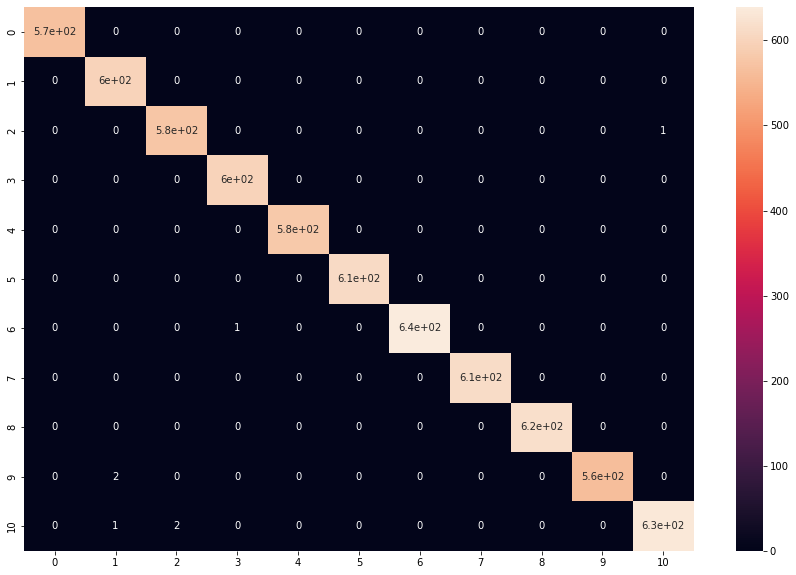

In [26]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Model Saving

In [27]:
# saving both cv and model
pickle.dump(cv, open("transform.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))

### Kaggle submission

In [32]:
def predict_unseen(X_train, y_train, X_test, model):
    # function to predict Unseen data
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

def save_sub(series, col_file="test.csv", file="sample_submission.csv"):
    # function to save submission
    my_series = pd.Series(series)
    prediction = my_series.to_frame()
    prediction = prediction.rename(columns = {0:"lang_id"})
    lang_id = pd.read_csv(col_file)[["lang_id"]]
    sample = lang_id.join(other = prediction)
    sample.to_csv(file, index=False)

In [34]:
unseen = pd.read_csv("test_set.csv")
X_test_set = unseen["text"]
clean_X_test_set = []
# iterating through all the text
for text in X_test_set:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
       # converting the text to lower case
        text = text.lower()
       # appending to data_list
        clean_X_test_set.append(text)
X_unseen = np.array(clean_X_test_set)
X_unseen = cv.transform(X_unseen)

In [35]:
X_unseen.shape

(5682, 141958)

In [36]:
y_test_pred = predict_unseen(X, y, X_unseen, MultinomialNB()) #observed to have better score (A)
# y_test_pred = model.predict(X_unseen) # (B)

In [37]:
np.unique(y_test_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [39]:
save_sub(y_test_pred, col_file="test_set.csv", file="submission/sample_submission_lemma_logreg_base.csv")

KeyError: "None of [Index(['lang_id'], dtype='object')] are in the [columns]"